In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./../../data/processed/_YM.csv')

In [67]:
df_m = df.groupby(['YEAR', 'MONTH', 'IMPORT'])['VART'].sum().unstack()
df_y = df.groupby(['YEAR', 'IMPORT'])['VART'].sum().unstack()
# df_y

In [4]:
df_m.std()

IMPORT
0    5.236926e+09
1    7.711758e+09
dtype: float64

In [5]:
df_m = df_m - df_m.mean()

In [68]:
from scipy import fft
import numpy as np

In [69]:
from numpy import ones_like, cos, pi, sin, allclose

# a0, a, b = fourier_series_coeff_numpy(df_m[0])

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


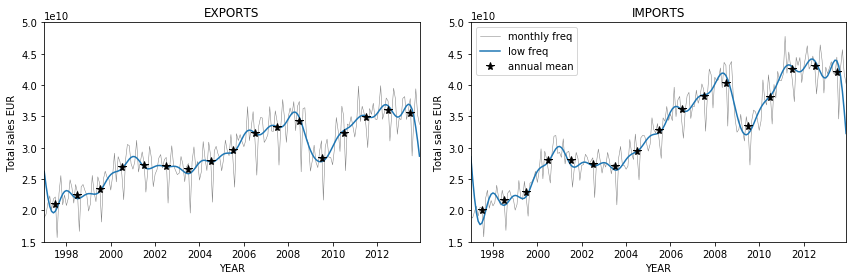

In [84]:


# np.std(x)/1e9

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

for i in range(2):
    ax = axs[i]
    ax.set_title(['EXPORTS', 'IMPORTS'][i])
    ax.set_ylabel('Total sales EUR')
    
    series = df_m[i]; series.index = np.arange(0, len(series))/12 + 1997
#     series_y = 
    
    y = fft(series) / len(series)

    total = sum([y[k] * np.exp(np.complex(0,1)*2*pi*k*np.arange(0, len(df_m))/len(df_m)) \
                    for k in range(-int(len(df_m)/2), int(len(df_m)/2))])
    
    annual_freq = int(204/2 - 17)
    lf =  sum([y[k] * np.exp(np.complex(0,1)*2*pi*k*np.arange(0, len(df_m))/len(df_m)) \
                    for k in range(-17, 17)])
    lf_series = pd.Series(lf, index = series.index)


    series.plot(ax = ax, color = '.5', lw = .5, label = 'monthly freq')
    lf_series.plot(ax = ax, label = 'low freq')
    yr_vals = df_y[i]/12.; yr_vals.index = yr_vals.index + .5
    (yr_vals).plot(lw = 0, marker = '*', markersize = 8, color = 'k', ax = ax, label = 'annual mean')
    ax.set_ylim(1.5e10, 5e10)
    if i ==1: ax.legend()

plt.tight_layout()
plt.savefig('./../../../WRITING/FIGURES/trade/fourier_demo.png')
plt.show()

In [26]:
series = df_m[0]
y = fft(series) / len(series)

w = sum([y[k] * np.exp(np.complex(0,1)*2*pi*k*np.arange(0, len(df_m))/len(df_m)) \
                for k in range(-int(len(df_m)/2), int(len(df_m)/2))])

In [27]:
np.sqrt(sum(abs(y[1:])**2))

5224074469.153926

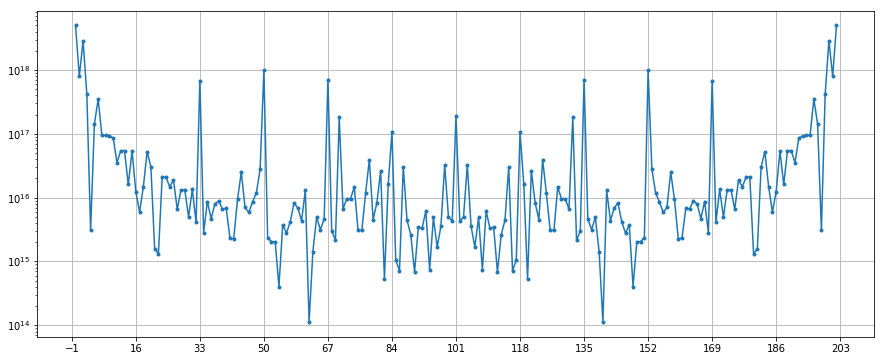

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (15, 6))

T = 17
ax.plot(abs(y[1:])**2, marker = '.')
# ax.plot(b, marker = '.')

# ax.set_
ax.set_yscale('log')
ax.set_xticks(range(-1, 12*T, 17))
plt.grid(True)
plt.show()

In [29]:
variances = abs(y[1:])**2

annual = sum(variances[:17] + variances[-17:])
high = sum(variances[17:-17])

# pct of variance explained:
print(100*annual/sum(variances))

print(100*high/sum(variances))


74.4917132772766
25.508286722723415


89.49444207895054
10.505557921049485


10.505557921049485

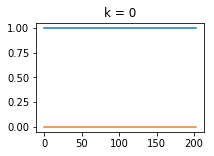

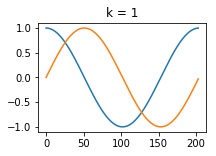

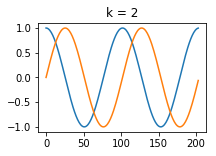

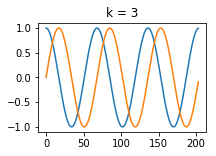

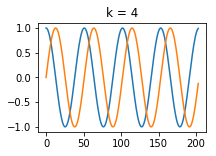

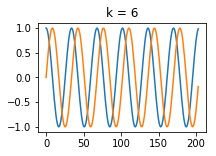

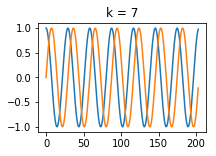

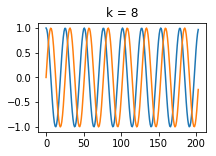

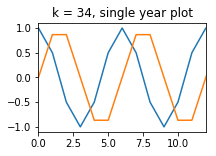

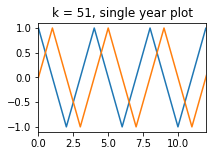

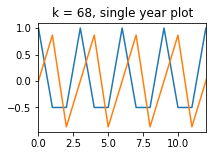

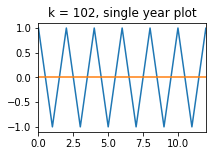

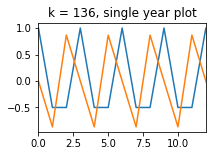

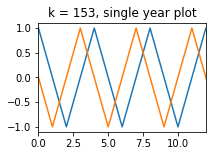

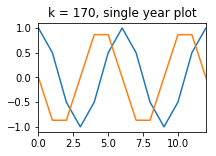

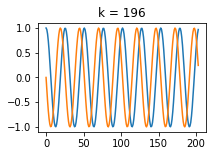

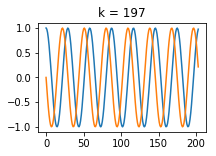

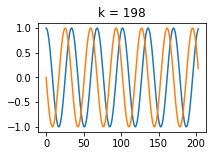

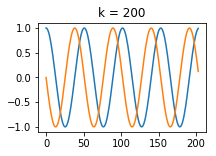

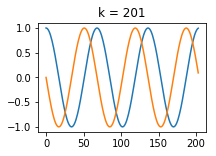

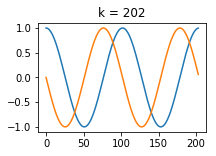

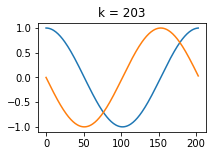

In [232]:
var_k = abs(y)**2

for k in np.argwhere(var_k > 2e17).flatten():
    comp = np.exp(np.complex(0,1)*2*pi*k*np.arange(0, len(df_m))/len(df_m))
    fig, ax = plt.subplots(1, figsize = (3, 2))
    ax.set_title('k = '+str(k))
    ax.plot(comp.real)
    ax.plot(comp.imag)
    if abs(k - 101) < 84:
        ax.set_xlim(0, 12)
        ax.set_title('k = '+str(k)+', single year plot')
    plt.show()

In [212]:
df_m.std()

IMPORT
0    5.236926e+09
1    7.711758e+09
dtype: float64

In [215]:
df_y.std()/12

IMPORT
0    4.664511e+09
1    7.533625e+09
dtype: float64

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


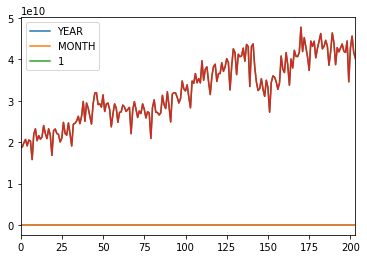

In [218]:
# np.std(x)/1e9

fig, ax = plt.subplots(1)

series.reset_index().plot(ax = ax)
ax.plot(w)